In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=f410a019bc94453486240037567f567bd007edf57d78c7559ac60c921acac65b
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark import SparkContext, SparkConf

In [ ]:
conf = SparkConf().setAppName("MovieAnalysis").setMaster("local[*]")
sc = SparkContext(conf=conf)

In [ ]:
lines = sc.textFile("Movies.csv.csv")

In [ ]:
action_award_films = lines \
    .map(lambda line: line.split(",")) \
    .filter(lambda cols: cols[3] == "Action" and cols[8] == "Yes") \
    .map(lambda cols: (cols[2], cols[0], cols[6]))
print("Action films that won an award:")
for film in action_award_films.collect():
    print(film)

Action films that won an award:


In [ ]:
award_winning_actors = lines \
    .map(lambda line: line.split(",")) \
    .filter(lambda cols: cols[8] == "Yes") \
    .map(lambda cols: (cols[4], (cols[2], cols[6])))
actor_movies = award_winning_actors.groupByKey() \
    .mapValues(list)
print("\nMovies for each award-winning actor:")
for actor, movies in actor_movies.collect():
    print(actor + ":")
    for movie in movies:
        print("\t", movie)


Movies for each award-winning actor:
AhlstedtBörje:
	 ('Fanny and Alexander', 'BergmanIngmar')
TrintignantJean-Louis:
	 ('A Man & a Woman', 'LelouchClaude')
	 ('Un Hombre y una Mujer', 'LelouchClaude')
AlterioHector:
	 ('Official StoryThe', 'PuenzoLuiz')
JosephsonErland:
	 ('Cries & Whispers', 'BergmanIngmar')
	 ('Scenes from a Marriage', 'BergmanIngmar')
LaFontJean-Philippe:
	 ("Babette's Feast", 'AxelGabriel')
WallaceDee:
	 ('E. T. The Extra-Terrestrial', 'SpielbergSteven')
BoyerCharles:
	 ('Gaslight', 'CukorGeorge')
BeattyNed:
	 ('A Woman Called Golda', 'GibsonAlan')
MatthauWalter:
	 ('Cactus Flower', 'SaksGene')
AumontJean-Pierre:
	 ('Day for Night', 'TruffautFrançois')
HurtWilliam:
	 ('Kiss of the Spider Woman', 'BabencoHector')
	 ('Children of a Lesser God', 'HainesRanda')
	 ('Accidental TouristThe', '')
NewmanPaul:
	 ('StingThe', 'HillGeorge Roy')
	 ('HustlerThe', 'RossenRobert')
	 ('Color of MoneyThe', 'ScorseseMartin')
	 ('Hud', 'RittMartin')
	 ('Butch Cassidy & the Sundance 

In [ ]:
non_award_movies = lines \
    .map(lambda line: line.split(",")) \
    .filter(lambda cols: cols[7] != "" and cols[8] == "No") \
    .sortBy(lambda cols: int(cols[7]), ascending=False)
top_10_non_award_movies = non_award_movies.take(10)
print("\nTop 10 most popular movies that did not win an award:")
for movie in top_10_non_award_movies:
    print(movie[2], "(Popularity:", movie[7] + ")")
top_10_non_award_movies = non_award_movies.take(10)


Top 10 most popular movies that did not win an award:
Happy Birthday to Me (Popularity: 88)
Final Notice (Popularity: 88)
Gonzo Presents Muppet Weird Stuff (Popularity: 88)
Guilty by Suspicion (Popularity: 88)
Swedenhielms (Popularity: 88)
Raw Nerve (Popularity: 88)
Five Corners (Popularity: 88)
Let It Ride (Popularity: 88)
New Year's Day (Popularity: 88)
Fellini Satyricon (Popularity: 88)


In [ ]:
least_popular_movies = lines \
    .map(lambda line: line.split(",")) \
    .filter(lambda cols: cols[0] != "Year" and cols[7] != '' and int(cols[0]) < 1980) \
    .sortBy(lambda cols: int(cols[7]))
bottom_10_movies_before_1980 = least_popular_movies.take(10)
print("\nBottom 10 least popular movies released before 1980:")
for movie in bottom_10_movies_before_1980:
    print(movie[2], "(Popularity:", movie[7] + ")")


Bottom 10 least popular movies released before 1980:
Shalako (Popularity: 0)
Airport (Popularity: 0)
Anna Christie (Popularity: 0)
Shout at the Devil (Popularity: 0)
Tales of Tomorrow (Popularity: 0)
Indiscreet (Popularity: 1)
Anderson TapesThe (Popularity: 1)
Stavisky (Popularity: 1)
Holocaust (Popularity: 1)
Law of the Golden West (Popularity: 1)


In [ ]:
movies_before_1990_sorted_by_title = lines \
    .map(lambda line: line.split(",")) \
    .filter(lambda cols: cols[0] != "Year" and cols[0].isdigit() and int(cols[0]) < 1990) \
    .sortBy(lambda cols: cols[2])
print("\nMovies released before 1990 sorted by title:")
for movie in movies_before_1990_sorted_by_title.collect():
    print(movie[2], "(Year:", movie[0] + ")")


Movies released before 1990 sorted by title:
2001: A Space Odyssey (Year: 1968)
48 Hrs. (Year: 1982)
8 1/2 (Year: 1963)
A Big Hand for the Little Lady (Year: 1966)
A Child Is Waiting (Year: 1962)
A Chorus LineThe Movie (Year: 1985)
A Clockwork Orange (Year: 1971)
A Coeur Joie(Head Over Heels) (Year: 1967)
A Cry in the Dark (Year: 1988)
A Dry White Season (Year: 1989)
A Fine Madness (Year: 1966)
A Fish Called Wanda (Year: 1988)
A Fistful of Dollars (Year: 1964)
A Guy Named Joe (Year: 1943)
A Lesson in Love (Year: 1954)
A Little Night Music (Year: 1977)
A Man & a Woman (Year: 1966)
A Man & a Woman: Twenty Years Later (Year: 1986)
A Man for All Seasons (Year: 1966)
A Matter of Time (Year: 1976)
A Month in the Country (Year: 1988)
A New Leaf (Year: 1971)
A New Life (Year: 1988)
A Nous la Liberte (Year: 1931)
A Patch of Blue (Year: 1965)
A Question of Honor (Year: 1982)
A Shot in the Dark (Year: 1964)
A Smoky Mountain Christmas (Year: 1986)
A Special Day (Year: 1977)
A Stolen Life (Year: 1

In [ ]:
sc.stop()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.ml.clustering import KMeans, BisectingKMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
spark = SparkSession.builder \
    .appName("Wine Dataset Analysis") \
    .getOrCreate()

In [ ]:
wine_df = spark.read.csv("wine.csv", header=True, inferSchema=True)

In [ ]:
print("Schema of the dataset:")
wine_df.printSchema()

Schema of the dataset:
root
 |-- Alcohol: double (nullable = true)
 |-- Malic_Acid: double (nullable = true)
 |-- Ash: double (nullable = true)
 |-- Ash_Alcanity: double (nullable = true)
 |-- Magnesium: integer (nullable = true)
 |-- Total_Phenols: double (nullable = true)
 |-- Flavanoids: double (nullable = true)
 |-- Nonflavanoid_Phenols: double (nullable = true)
 |-- Proanthocyanins: double (nullable = true)
 |-- Color_Intensity: double (nullable = true)
 |-- Hue: double (nullable = true)
 |-- OD280: double (nullable = true)
 |-- Proline: integer (nullable = true)



In [ ]:
print("Summary statistics of the dataset:")
wine_df.describe().show()

Summary statistics of the dataset:
+-------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+------------------+-----------------+-------------------+------------------+-----------------+
|summary|           Alcohol|        Malic_Acid|               Ash|     Ash_Alcanity|         Magnesium|     Total_Phenols|        Flavanoids|Nonflavanoid_Phenols|   Proanthocyanins|  Color_Intensity|                Hue|             OD280|          Proline|
+-------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+------------------+-----------------+-------------------+------------------+-----------------+
|  count|               178|               178|               178|              178|               178|               178|               178|                 178|               178|             

In [ ]:
numeric_cols = wine_df.columns[1:]  # Exclude the first column "ID"
outliers = wine_df.select(
    *[col(c).alias(c) for c in numeric_cols],
    *(
        ((col(c) - wine_df.agg({c: "mean"}).collect()[0][0]) / wine_df.agg({c: "stddev"}).collect()[0][0]).alias(c + "_zscore")
        for c in numeric_cols
    )
).filter(
    (col("Malic_Acid_zscore") > 3) |
    (col("Ash_zscore") > 3) |
    (col("Ash_Alcanity_zscore") > 3) |
    (col("Magnesium_zscore") > 3) |
    (col("Total_Phenols_zscore") > 3) |
    (col("Flavanoids_zscore") > 3) |
    (col("Nonflavanoid_Phenols_zscore") > 3) |
    (col("Proanthocyanins_zscore") > 3) |
    (col("Color_Intensity_zscore") > 3) |
    (col("Hue_zscore") > 3) |
    (col("OD280_zscore") > 3) |
    (col("Proline_zscore") > 3)
)
print("Outliers in the dataset:")
outliers.show()

Outliers in the dataset:
+----------+----+------------+---------+-------------+----------+--------------------+---------------+---------------+----+-----+-------+--------------------+-------------------+--------------------+--------------------+--------------------+-------------------+---------------------------+----------------------+----------------------+--------------------+--------------------+--------------------+
|Malic_Acid| Ash|Ash_Alcanity|Magnesium|Total_Phenols|Flavanoids|Nonflavanoid_Phenols|Proanthocyanins|Color_Intensity| Hue|OD280|Proline|   Malic_Acid_zscore|         Ash_zscore| Ash_Alcanity_zscore|    Magnesium_zscore|Total_Phenols_zscore|  Flavanoids_zscore|Nonflavanoid_Phenols_zscore|Proanthocyanins_zscore|Color_Intensity_zscore|          Hue_zscore|        OD280_zscore|      Proline_zscore|
+----------+----+------------+---------+-------------+----------+--------------------+---------------+---------------+----+-----+-------+--------------------+-------------------

In [ ]:
feature_cols = wine_df.columns[1:]  # Exclude the first column "ID"
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
feature_vector_df = assembler.transform(wine_df).select("features")

In [ ]:
correlation_matrix = Correlation.corr(feature_vector_df, "features").head()
corr_matrix = correlation_matrix[0].toArray()

In [ ]:
print("Correlation matrix between features:")
for i in range(len(feature_cols)):
    for j in range(len(feature_cols)):
        print(f"{feature_cols[i]} - {feature_cols[j]}: {corr_matrix[i][j]}")

Correlation matrix between features:
Malic_Acid - Malic_Acid: 1.0
Malic_Acid - Ash: 0.16404546975674444
Malic_Acid - Ash_Alcanity: 0.2885004028036244
Malic_Acid - Magnesium: -0.05457509608400123
Malic_Acid - Total_Phenols: -0.3351669971620654
Malic_Acid - Flavanoids: -0.41100658761426306
Malic_Acid - Nonflavanoid_Phenols: 0.292977133480648
Malic_Acid - Proanthocyanins: -0.220746186792846
Malic_Acid - Color_Intensity: 0.24898534409523967
Malic_Acid - Hue: -0.5612956886649446
Malic_Acid - OD280: -0.36871042829326395
Malic_Acid - Proline: -0.19201056463400953
Ash - Malic_Acid: 0.16404546975674444
Ash - Ash: 1.0
Ash - Ash_Alcanity: 0.44336718655231105
Ash - Magnesium: 0.2865866912581744
Ash - Total_Phenols: 0.12897953765406986
Ash - Flavanoids: 0.11507727901397241
Ash - Nonflavanoid_Phenols: 0.1862304463169212
Ash - Proanthocyanins: 0.009651935152086882
Ash - Color_Intensity: 0.2588872592996535
Ash - Hue: -0.074666889032773
Ash - OD280: 0.003911230630275289
Ash - Proline: 0.223626263687572

In [ ]:
kmeans = KMeans().setK(3).setSeed(1)
kmeans_model = kmeans.fit(feature_vector_df)
kmeans_predictions = kmeans_model.transform(feature_vector_df)

In [ ]:
print("K-means clustering results:")
kmeans_predictions.show()

K-means clustering results:
+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[1.71,2.43,15.6,1...|         2|
|[1.78,2.14,11.2,1...|         2|
|[2.36,2.67,18.6,1...|         1|
|[1.95,2.5,16.8,11...|         1|
|[2.59,2.87,21.0,1...|         2|
|[1.76,2.45,15.2,1...|         1|
|[1.87,2.45,14.6,9...|         1|
|[2.15,2.61,17.6,1...|         1|
|[1.64,2.17,14.0,9...|         2|
|[1.35,2.27,16.0,9...|         2|
|[2.16,2.3,18.0,10...|         1|
|[1.48,2.32,16.8,9...|         1|
|[1.73,2.41,16.0,8...|         1|
|[1.73,2.39,11.4,9...|         1|
|[1.87,2.38,12.0,1...|         1|
|[1.81,2.7,17.2,11...|         1|
|[1.92,2.72,20.0,1...|         1|
|[1.57,2.62,20.0,1...|         1|
|[1.59,2.48,16.5,1...|         1|
|[3.1,2.56,15.2,11...|         2|
+--------------------+----------+
only showing top 20 rows



In [ ]:
cluster_centers = kmeans_model.clusterCenters()
sample_df = wine_df.select(feature_cols).sample(False, 0.1).toPandas()
sample_df['cluster'] = kmeans_predictions.select('prediction').toPandas()

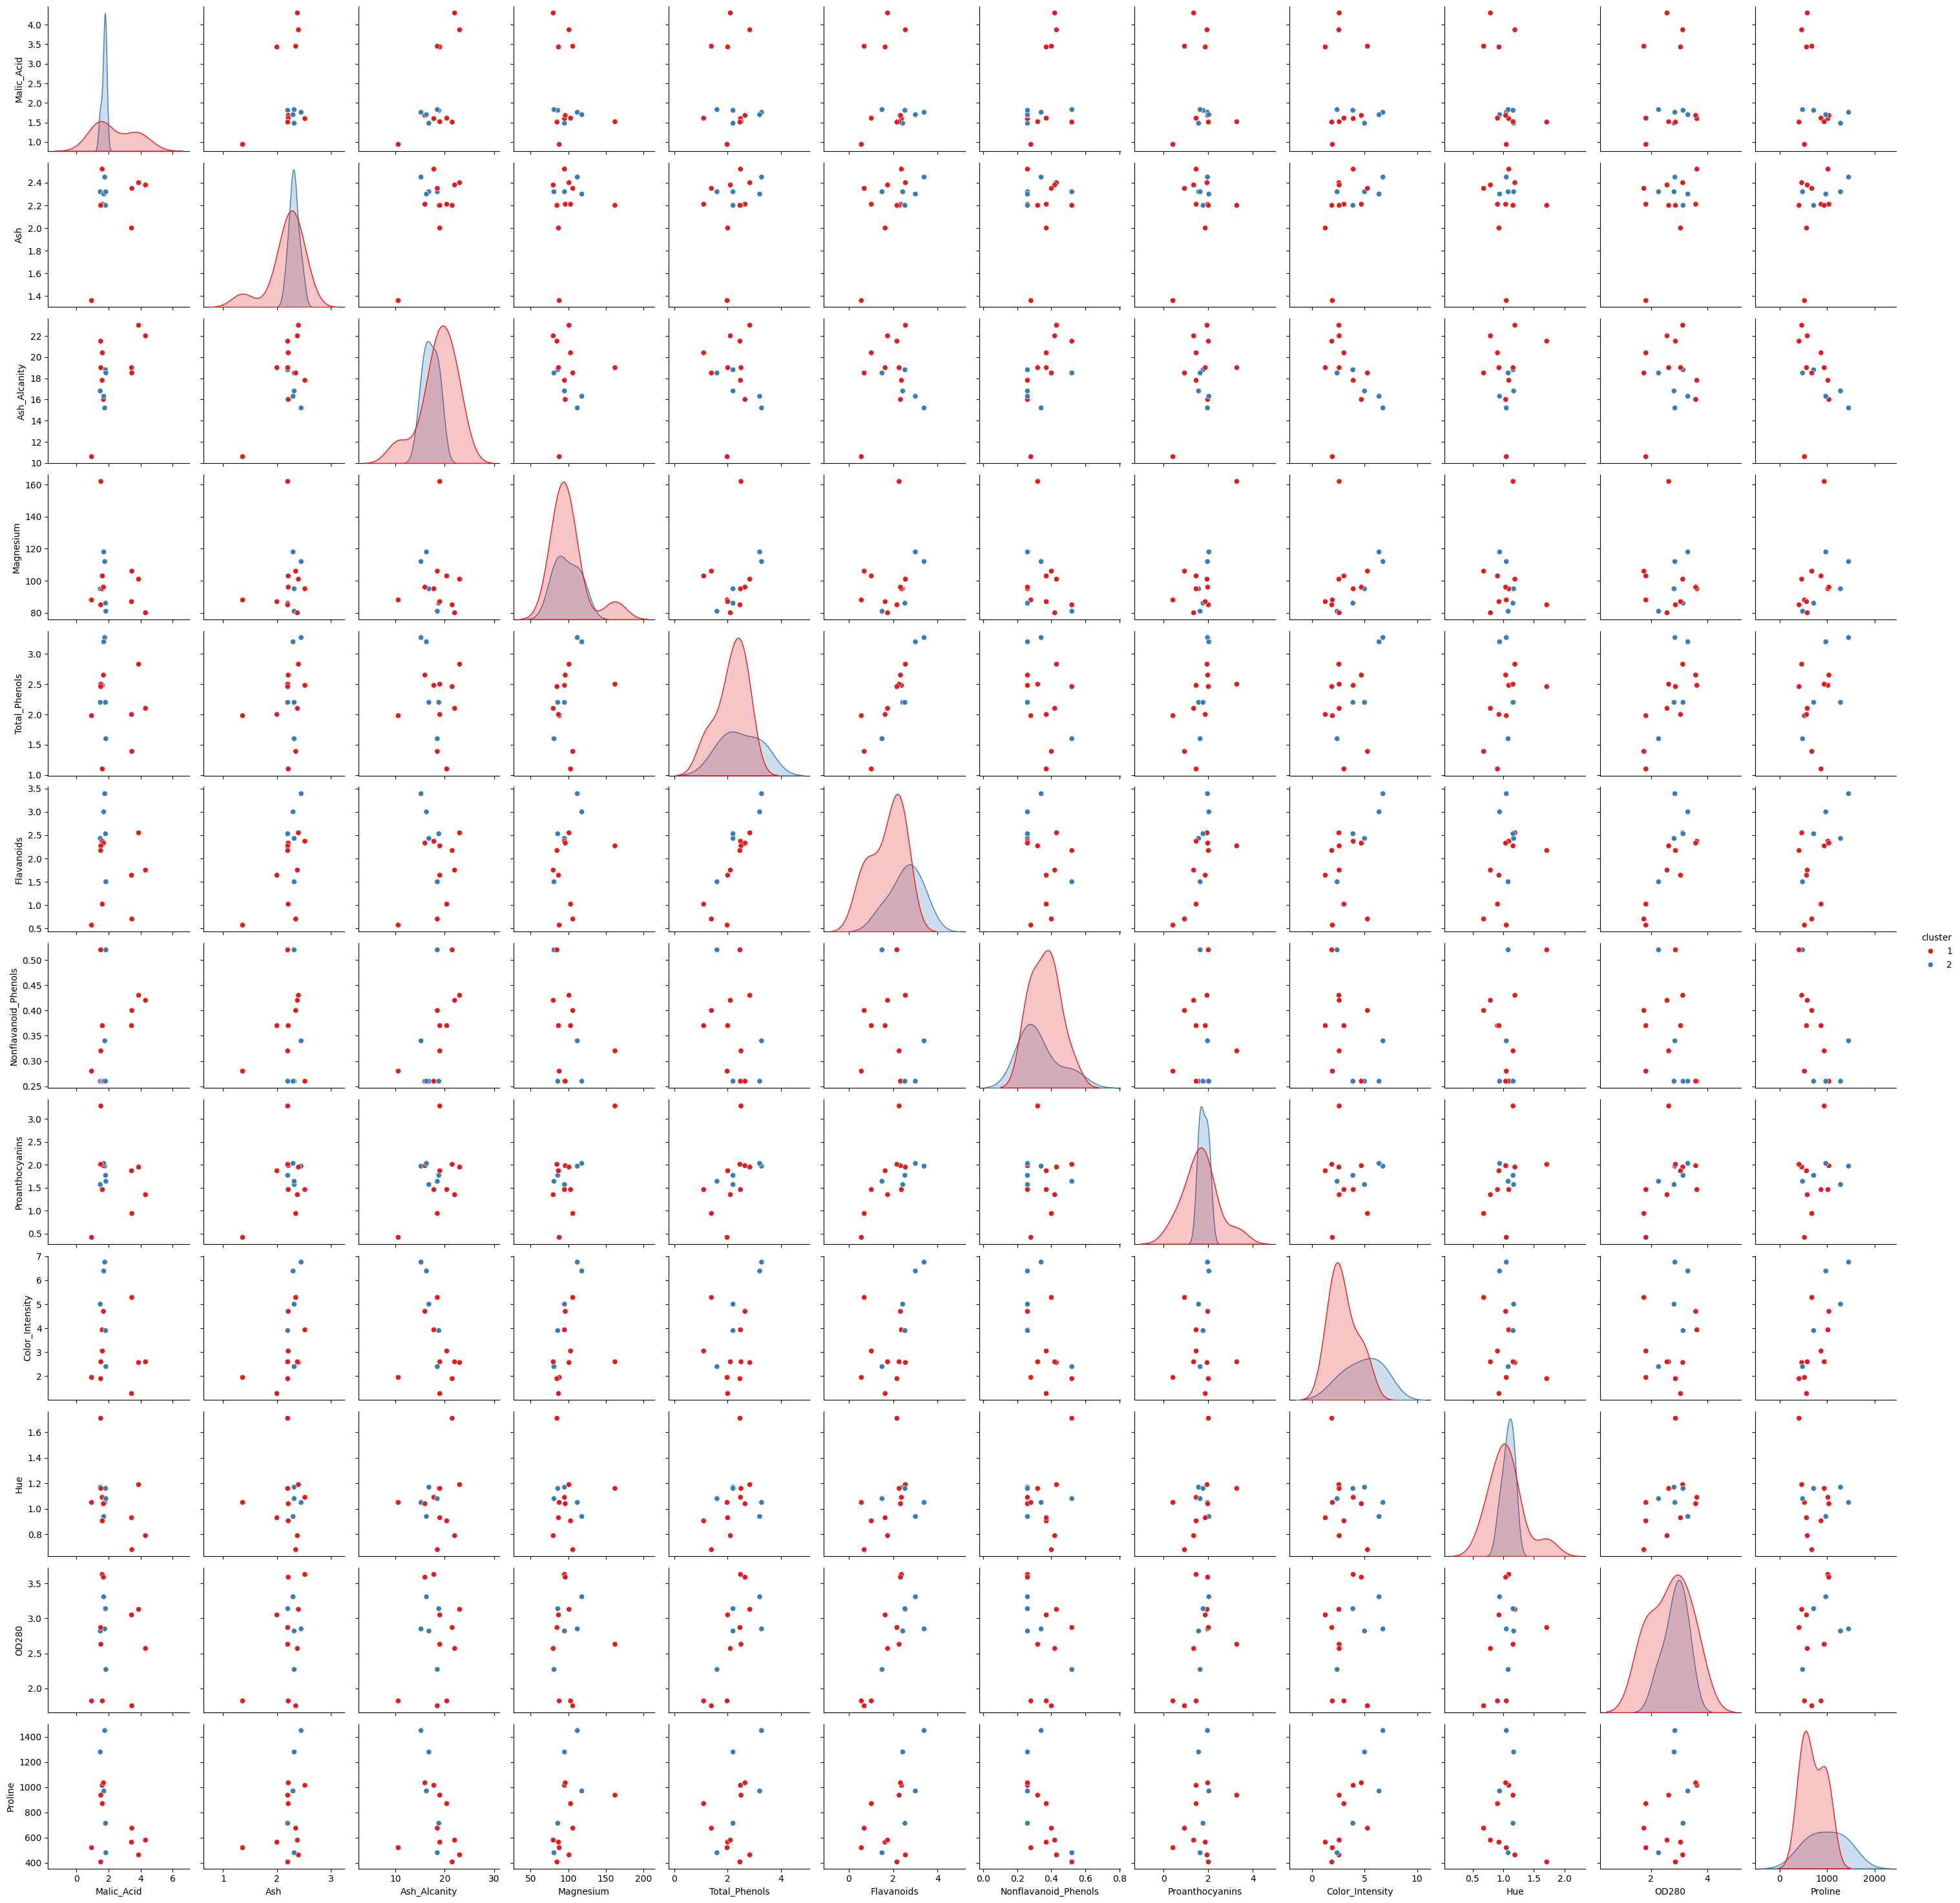

In [ ]:
sns.pairplot(sample_df, hue='cluster', palette='Set1')
plt.show()

In [ ]:
bisecting_kmeans = BisectingKMeans().setK(3).setSeed(1)
bisecting_kmeans_model = bisecting_kmeans.fit(feature_vector_df)
bisecting_kmeans_predictions = bisecting_kmeans_model.transform(feature_vector_df)

In [ ]:
print("Bisecting K-means clustering results:")
bisecting_kmeans_predictions.show()

Bisecting K-means clustering results:
+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[1.71,2.43,15.6,1...|         2|
|[1.78,2.14,11.2,1...|         2|
|[2.36,2.67,18.6,1...|         2|
|[1.95,2.5,16.8,11...|         2|
|[2.59,2.87,21.0,1...|         1|
|[1.76,2.45,15.2,1...|         2|
|[1.87,2.45,14.6,9...|         2|
|[2.15,2.61,17.6,1...|         2|
|[1.64,2.17,14.0,9...|         2|
|[1.35,2.27,16.0,9...|         2|
|[2.16,2.3,18.0,10...|         2|
|[1.48,2.32,16.8,9...|         2|
|[1.73,2.41,16.0,8...|         2|
|[1.73,2.39,11.4,9...|         2|
|[1.87,2.38,12.0,1...|         2|
|[1.81,2.7,17.2,11...|         2|
|[1.92,2.72,20.0,1...|         2|
|[1.57,2.62,20.0,1...|         2|
|[1.59,2.48,16.5,1...|         2|
|[3.1,2.56,15.2,11...|         1|
+--------------------+----------+
only showing top 20 rows



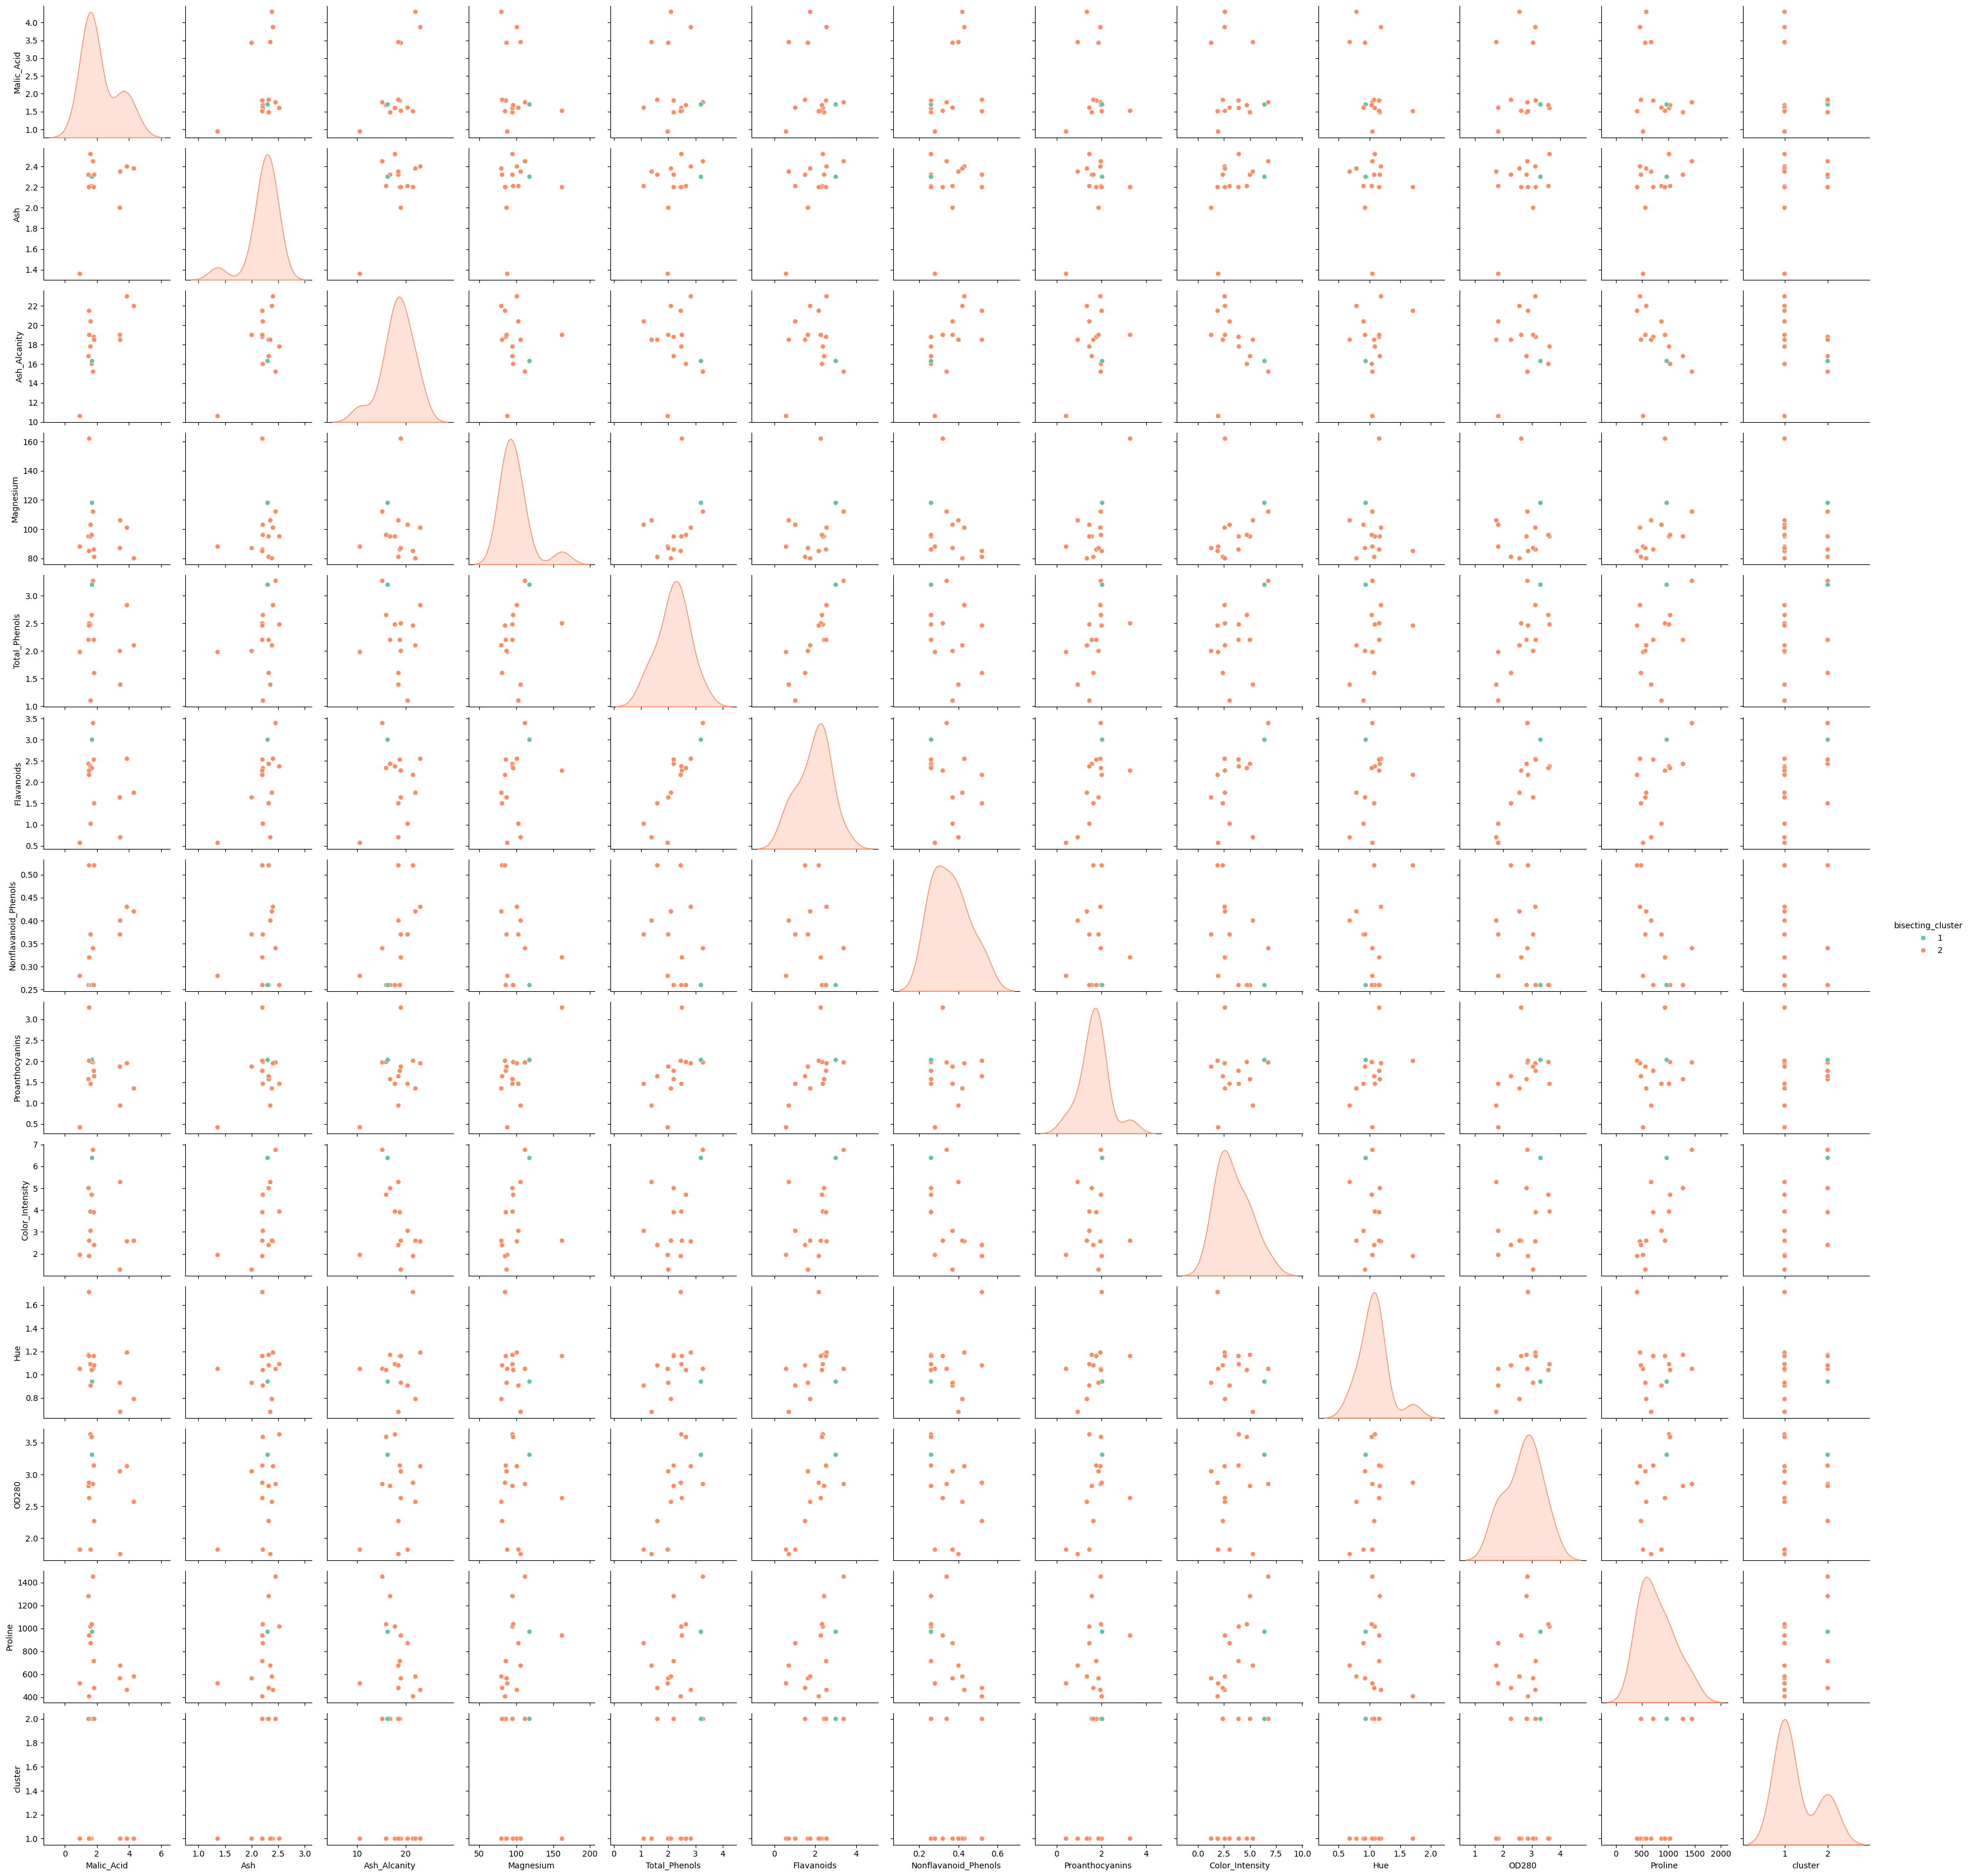

In [ ]:
sample_df['bisecting_cluster'] = bisecting_kmeans_predictions.select('prediction').toPandas()
sns.pairplot(sample_df, hue='bisecting_cluster', palette='Set2')
plt.show()

In [ ]:
sample_df = wine_df.select(numeric_cols).toPandas().dropna()

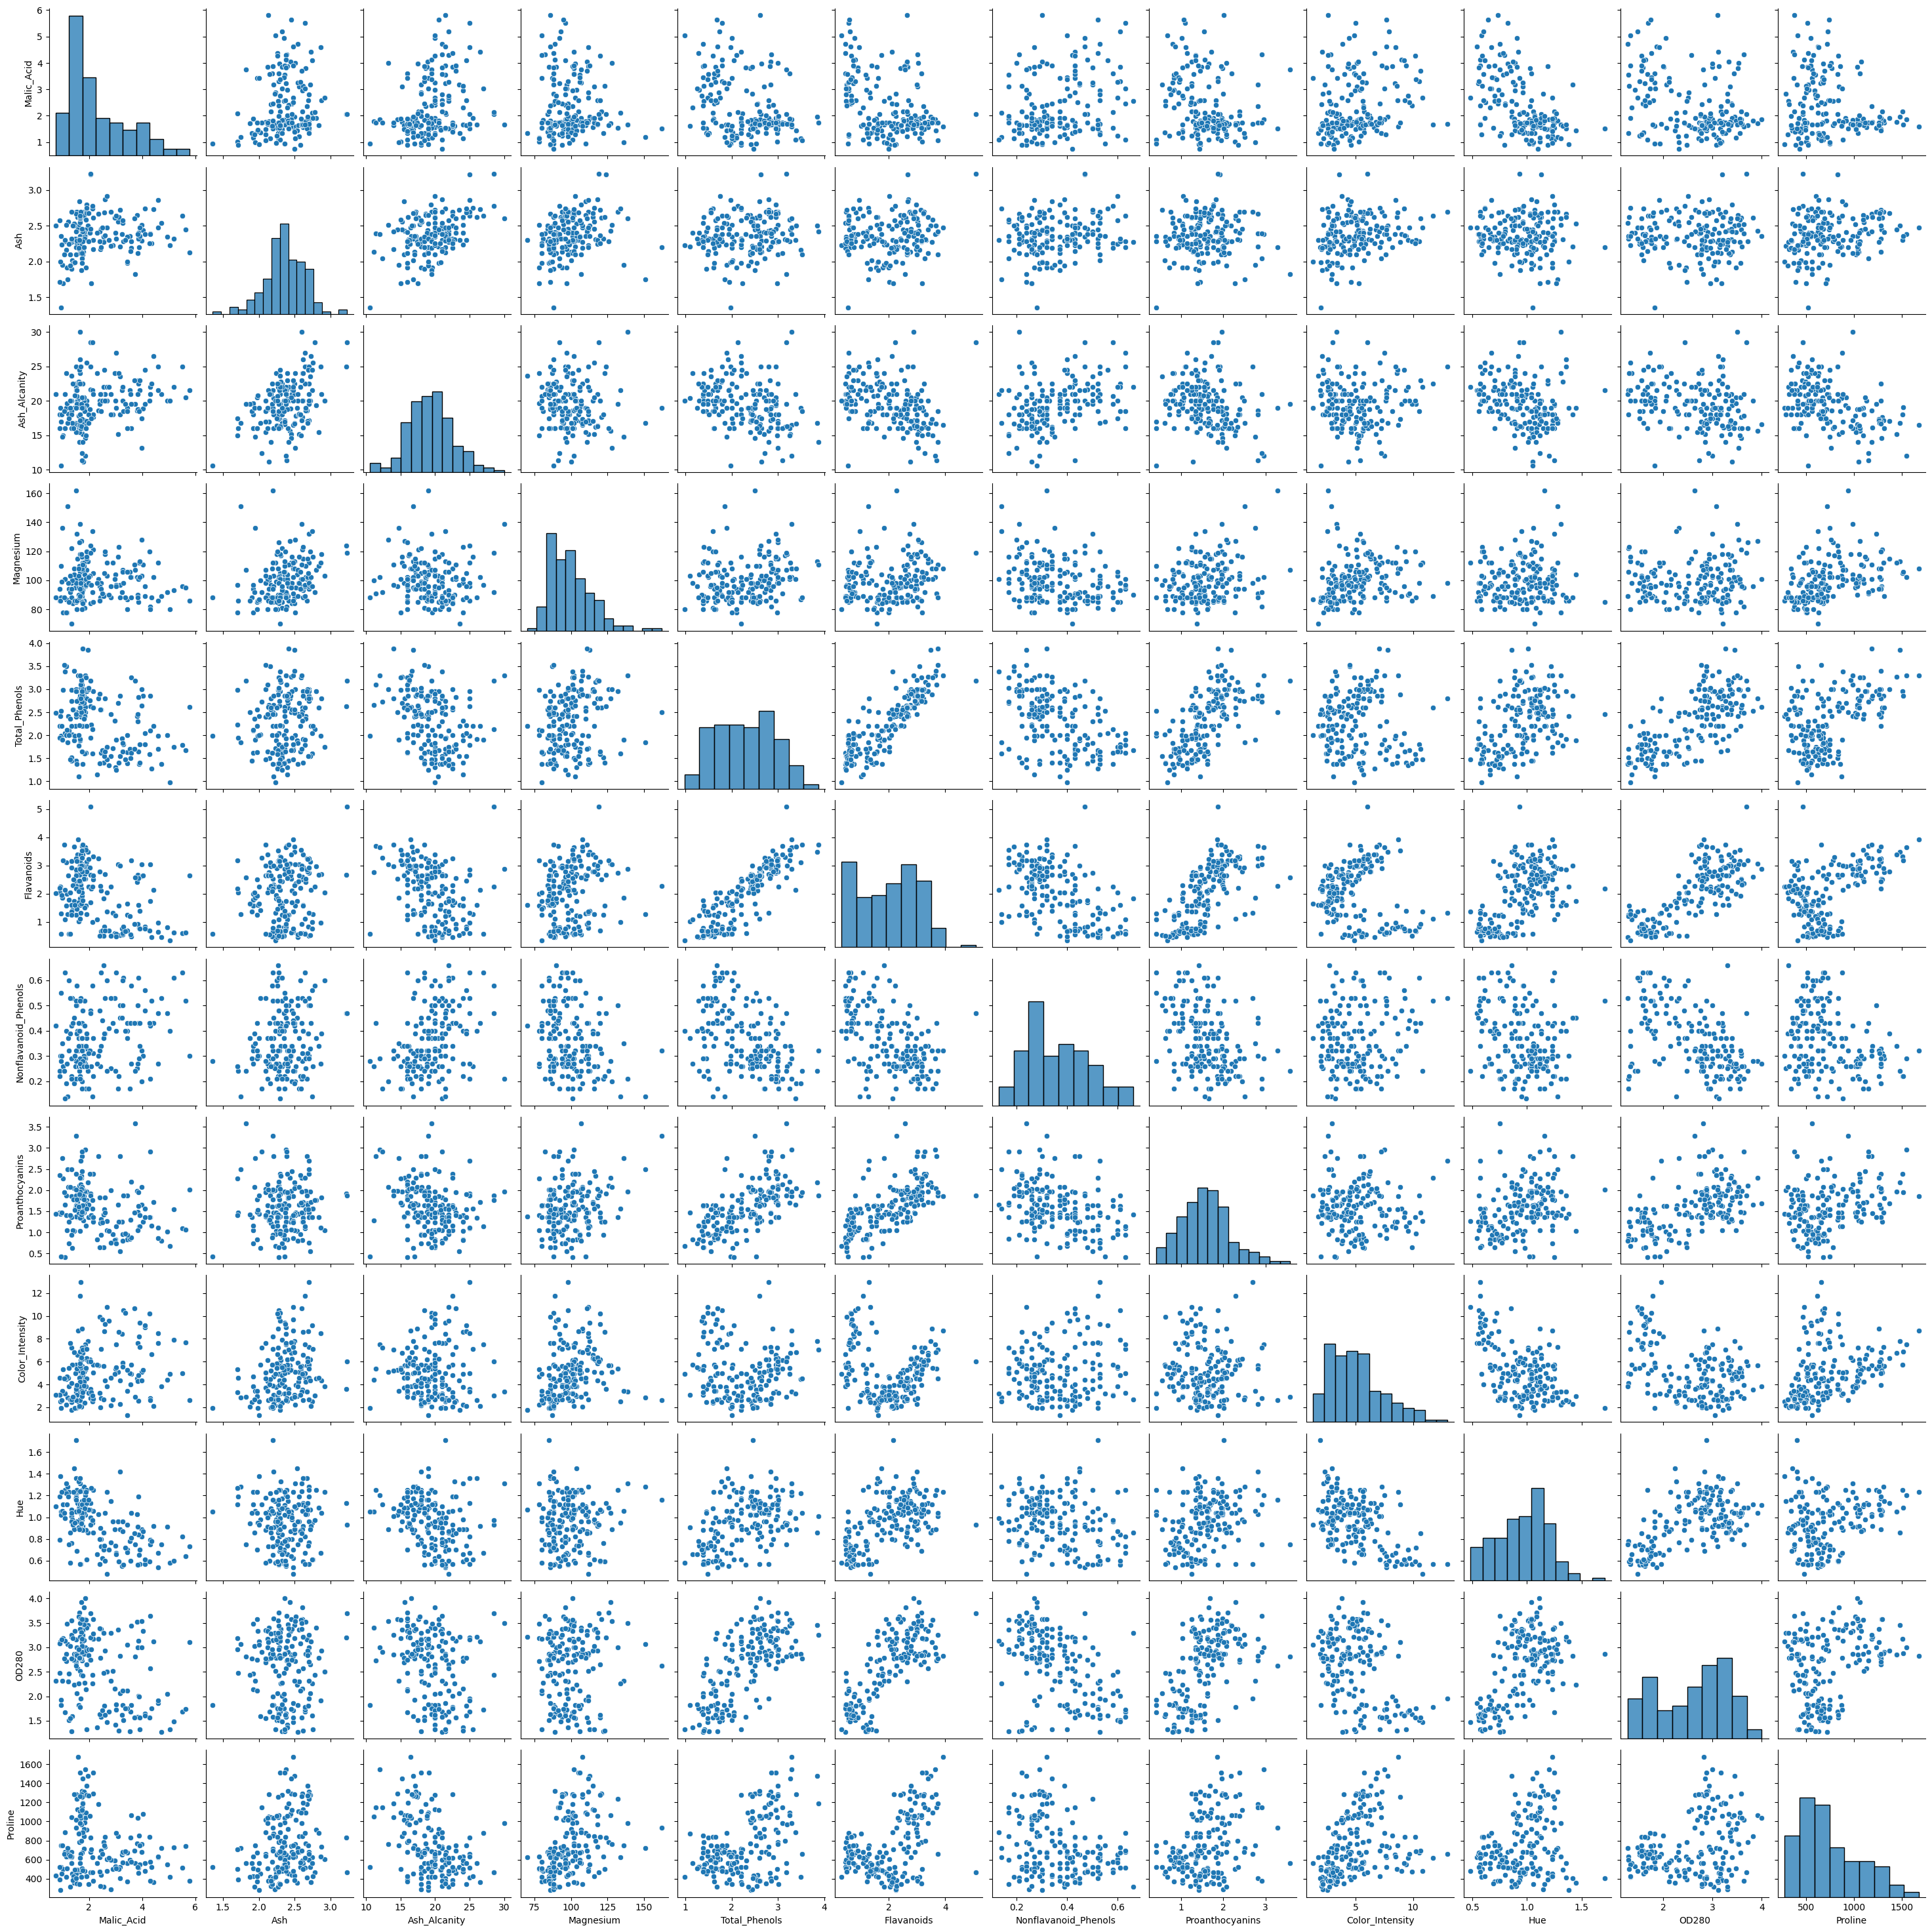

In [ ]:
sns.pairplot(sample_df)
plt.show()
spark.stop()
